# Imports

In [146]:
import pandas as pd
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set_style('ticks')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn import datasets, linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import itertools
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from xgboost import plot_importance

import warnings
warnings.filterwarnings('ignore')

# Read in Data

In [147]:
df = pd.read_csv('file:///Users/chrisfiorentine/Downloads/2667_4430_bundle_archive.zip')

# EDA 

### Basic EDA

In [148]:
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [149]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [150]:
df.shape

(3333, 21)

In [151]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [152]:
df.isnull().describe()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333,3333,3333,3333,3333,3333,3333,3333,3333,3333,...,3333,3333,3333,3333,3333,3333,3333,3333,3333,3333
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,3333,3333,3333,3333,3333,3333,3333,3333,3333,3333,...,3333,3333,3333,3333,3333,3333,3333,3333,3333,3333


In [153]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [154]:
df.drop(columns = 'phone number', inplace = True)

In [155]:
df['area code'].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

In [156]:
df['account length'].describe()

count    3333.000000
mean      101.064806
std        39.822106
min         1.000000
25%        74.000000
50%       101.000000
75%       127.000000
max       243.000000
Name: account length, dtype: float64

### Graphing

<Figure size 2160x720 with 0 Axes>

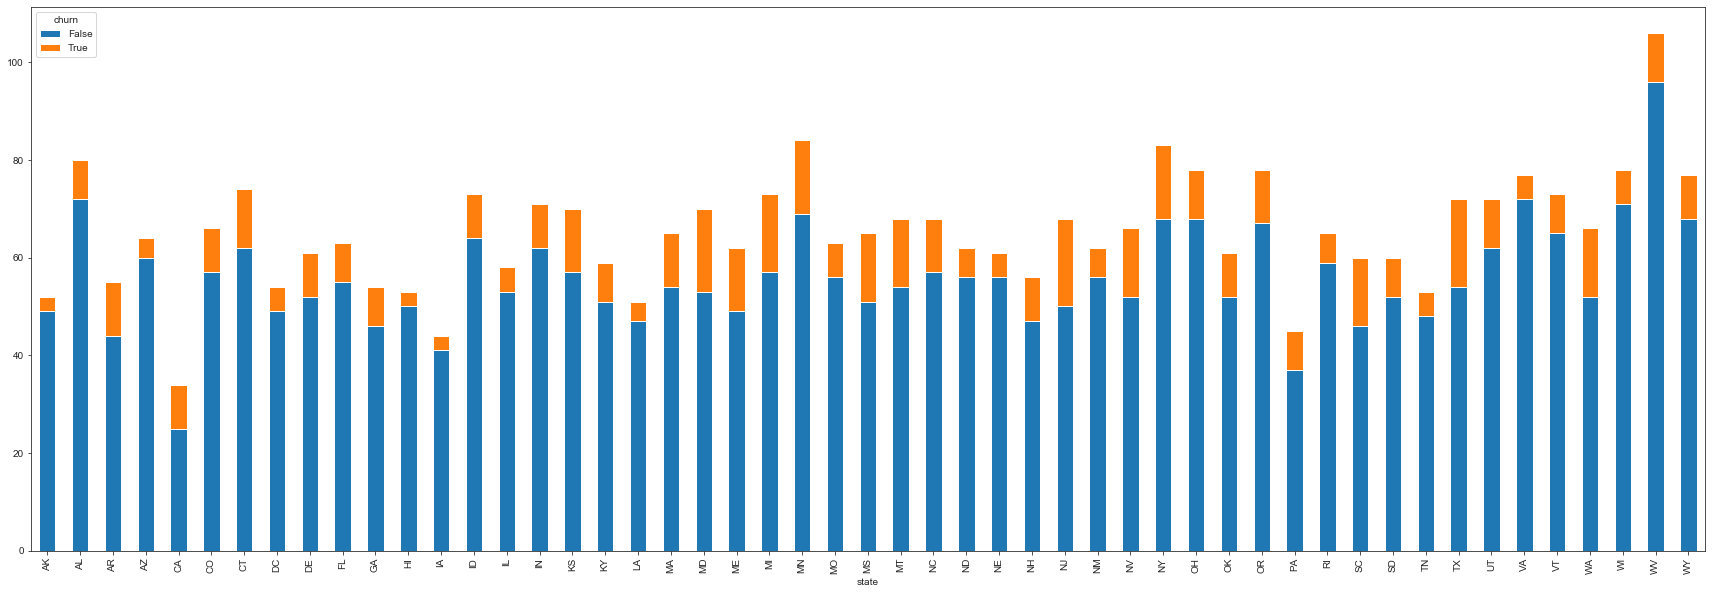

In [157]:
# Plotting States and Churn
plt.figure(figsize = (30,10))
state = df.groupby(['state','churn'])['state'].count().unstack()
state.plot(kind = 'bar', stacked = True,figsize = (30,10))

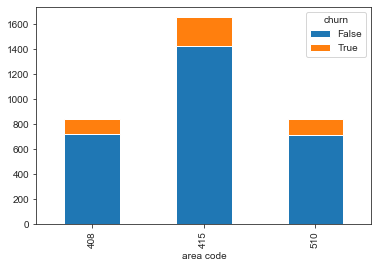

In [158]:
# Plotting Area Code and Churn
area_code = df.groupby(['area code','churn'])['area code'].count().unstack()
area_code.plot(kind = 'bar', stacked = True,)

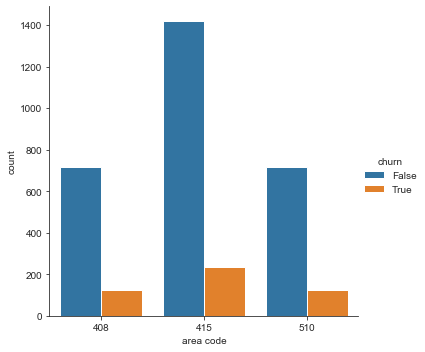

In [159]:
#Another Area Code and Churn
sns.catplot(kind = 'count',data = df, x = 'area code', hue = 'churn')

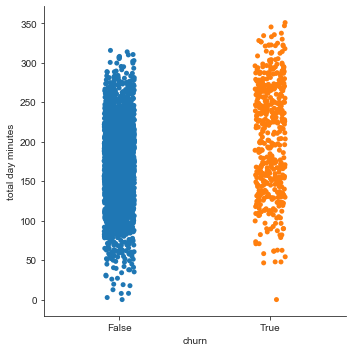

In [199]:
# Graphing Churn and Account Length
sns.catplot(data = df, x = 'churn',y = 'total day minutes')

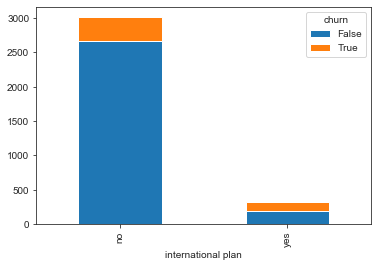

In [161]:
# International Plan and Churn
int_plan = df.groupby(['international plan','churn'])['international plan'].count().unstack()
int_plan.plot(kind = 'bar', stacked = True,)

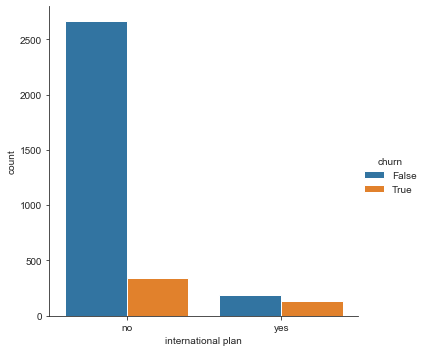

In [162]:
# International Plan and Churn
sns.catplot(kind = 'count',data = df, x = 'international plan', hue = 'churn')

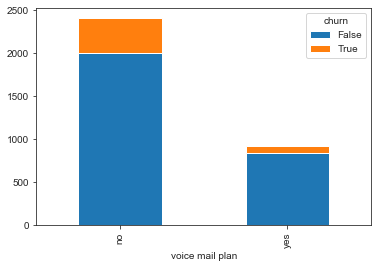

In [163]:
# Voice Mail Plan and Churn
voice_plan = df.groupby(['voice mail plan','churn'])['voice mail plan'].count().unstack()
voice_plan.plot(kind = 'bar', stacked = True,)

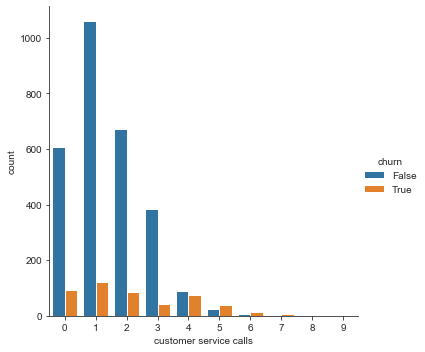

In [164]:
# Customer Service Calls and Churn
sns.catplot(kind = 'count',data = df, x = 'customer service calls', hue = 'churn')

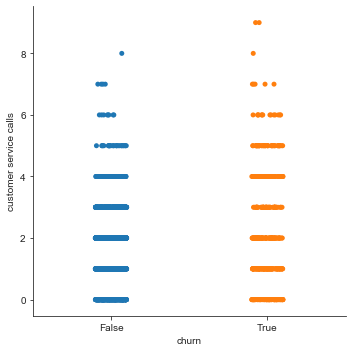

In [200]:
sns.catplot(data = df, x = 'churn',y = 'customer service calls')

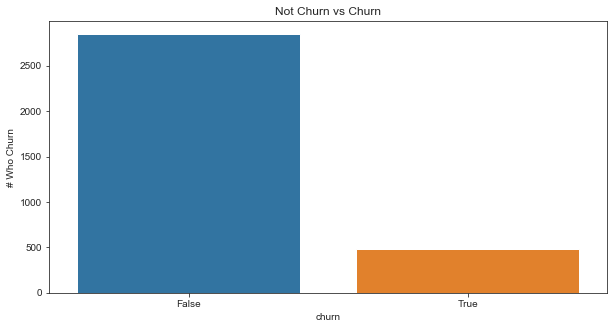

In [191]:
# Graph of Churn
plt.figure(figsize = (10,5))
sns.countplot(df.churn)
plt.title('Not Churn vs Churn')
plt.ylabel('# Who Churn')
plt.show()

### Exploring Correlations 

In [166]:
# Create a correlation matrix 
corr_matrix = df.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,NaN,0.012463,0.004628,0.006216,0.038470,0.006214,0.006757,0.019260,0.006745,0.008955,0.013176,0.008960,0.009514,0.020661,0.009546,0.003796,0.016541
area code,NaN,NaN,0.001994,0.008264,0.009646,0.008264,0.003580,0.011886,0.003607,0.005825,0.016522,0.005845,0.018288,0.024179,0.018395,0.027572,0.006174
number vmail messages,NaN,NaN,NaN,0.000778,0.009548,0.000776,0.017562,0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,0.013263,0.089728
total day minutes,NaN,NaN,NaN,NaN,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,0.010155,0.008033,0.010092,0.013423,0.205151
total day calls,NaN,NaN,NaN,NaN,NaN,0.006753,0.021451,0.006462,0.021449,0.022938,0.019557,0.022927,0.021565,0.004574,0.021666,0.018942,0.018459
total day charge,NaN,NaN,NaN,NaN,NaN,NaN,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,0.010157,0.008032,0.010094,0.013427,0.205151
total eve minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011430,1.000000,0.012584,0.007586,0.012593,0.011035,0.002541,0.011067,0.012985,0.092796
total eve calls,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011423,0.002093,0.007710,0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total eve charge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012592,0.007596,0.012601,0.011043,0.002541,0.011074,0.012987,0.092786
total night minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011204,0.999999,0.015207,0.012353,0.015180,0.009288,0.035493


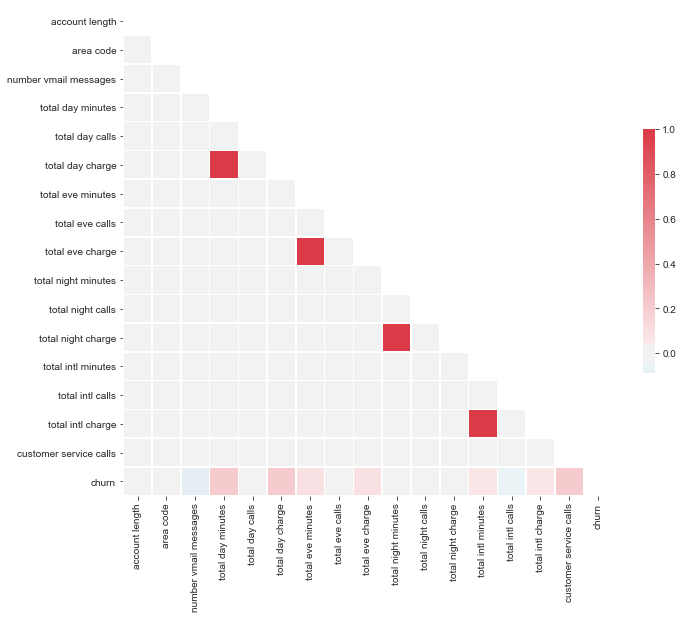

In [167]:
# Graph a correlation heat map
corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Finding the charge per minute

In [168]:
df['charge_per_minute_day'] = df['total day charge'] / df['total day minutes']

In [169]:
df['charge_per_minute_eve'] = df['total eve charge'] / df['total eve minutes']

In [170]:
df['charge_per_minute_night'] = df['total night charge'] / df['total night minutes']

In [171]:
df['charge_per_minute_intl'] = df['total intl charge'] / df['total intl minutes']

In [172]:
charge_per_min_df = pd.DataFrame(data = df['charge_per_minute_day'].describe())

In [173]:
charge_per_min_df['Eve_Charge'] = df['charge_per_minute_eve'].describe()

In [174]:
charge_per_min_df['Night_Charge'] = df['charge_per_minute_night'].describe()

In [175]:
charge_per_min_df['Intl_Charge'] = df['charge_per_minute_intl'].describe()

In [176]:
charge_per_min_df.rename(columns = {'charge_per_minute_day': 'Day_Charge'}, inplace = True)

In [177]:
charge_per_min_df

,Day_Charge,Eve_Charge,Night_Charge,Intl_Charge
count,3331.000000,3332.000000,3333.000000,3315.000000
mean,0.170003,0.085001,0.045000,0.270057
std,0.000028,0.000016,0.000017,0.000329
min,0.169231,0.084936,0.044828,0.268182
25%,0.169989,0.084988,0.044988,0.269811
50%,0.170004,0.085000,0.045000,0.270000
75%,0.170017,0.085013,0.045013,0.270297
max,0.170513,0.085075,0.045111,0.272727


In [178]:
df = df.drop('charge_per_minute_day', axis = 1)
df = df.drop('charge_per_minute_eve', axis = 1)
df = df.drop('charge_per_minute_night', axis = 1)
df = df.drop('charge_per_minute_intl', axis = 1)

### Exploring Target Variable

In [179]:
df.churn.value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [194]:
churn_rate = df['churn'].mean()
churn_rate

0.14491449144914492

# Feature Selection/Engineering

In [181]:
# drop highly correlated columns
to_drop = [column for column in upper.columns if any(upper[column] > 0.97)]
df.drop(columns=to_drop, inplace=True)


In [182]:
to_drop

['total day charge',
 'total eve charge',
 'total night charge',
 'total intl charge']

### Getting Dummies

In [183]:
df_dummies = df.copy()
df_dummies = pd.get_dummies(df, columns = ['state', 'international plan', 'voice mail plan'])
df_dummies

,account length,area code,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,128,415,25,265.1,110,197.4,99,244.7,91,10.0,...,0,0,0,0,0,0,1,0,0,1
1,107,415,26,161.6,123,195.5,103,254.4,103,13.7,...,0,0,0,0,0,0,1,0,0,1
2,137,415,0,243.4,114,121.2,110,162.6,104,12.2,...,0,0,0,0,0,0,1,0,1,0
3,84,408,0,299.4,71,61.9,88,196.9,89,6.6,...,0,0,0,0,0,0,0,1,1,0
4,75,415,0,166.7,113,148.3,122,186.9,121,10.1,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,36,156.2,77,215.5,126,279.1,83,9.9,...,0,0,0,0,0,0,1,0,0,1
3329,68,415,0,231.1,57,153.4,55,191.3,123,9.6,...,0,0,0,0,1,0,1,0,1,0
3330,28,510,0,180.8,109,288.8,58,191.9,91,14.1,...,0,0,0,0,0,0,1,0,1,0
3331,184,510,0,213.8,105,159.6,84,139.2,137,5.0,...,0,0,0,0,0,0,0,1,1,0


In [184]:
df_features = df_dummies.drop('churn', axis = 1)
df_features.columns

Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total eve minutes',
       'total eve calls', 'total night minutes', 'total night calls',
       'total intl minutes', 'total intl calls', 'customer service calls',
       'state_AK', 'state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO',
       'state_CT', 'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_HI',
       'state_IA', 'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY',
       'state_LA', 'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN',
       'state_MO', 'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE',
       'state_NH', 'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH',
       'state_OK', 'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD',
       'state_TN', 'state_TX', 'state_UT', 'state_VA', 'state_VT', 'state_WA',
       'state_WI', 'state_WV', 'state_WY', 'international plan_no',
       'international pl

In [185]:
features = df.drop('churn', axis = 1)

In [186]:
target = df['churn']

### Train Test Split and sclaing

In [187]:
# Train Test Split
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_features, target, test_size=0.25, random_state=20)

In [188]:
#scaling
scaler = StandardScaler()  
scaler.fit(X_train2)

X_train_scaled = scaler.transform(X_train2)  
X_test_scaled = scaler.transform(X_test2)

## Handling Class Imbalance

### Upsampling

In [189]:
training  = pd.concat([X_train2, y_train2], axis=1)

In [190]:
not_churn = training[training.churn==False]
churn = training[training.churn==True]

In [57]:
print('not churn count: '+ str(len(not_churn)))
print('churn count: '+ str(len(churn)))

not churn count: 2136
churn count: 363


In [58]:
churn_upsampled = resample(churn,
                          replace=True, 
                          n_samples=len(not_churn), 
                          random_state=20) 

In [59]:
churn_upsampled.shape

(2136, 68)

In [60]:
upsampled = pd.concat([not_churn, churn_upsampled])

upsampled.churn.value_counts()

True     2136
False    2136
Name: churn, dtype: int64

In [61]:
y_train_upsampled = upsampled.churn
X_train_upsampled = upsampled.drop('churn', axis=1)

### Smote

In [62]:
sm = SMOTE(sampling_strategy=1.0, random_state=20)
X_train_smote, y_train_smote = sm.fit_sample(X_train2, y_train2)

# Modeling

### Dummy Classifier

In [63]:
# Run a dummy classifier on data
X_train_dummy, X_test_dummy, y_train_dummy, y_test_dummy = train_test_split(features, target, test_size=0.25, random_state=20)

dummy = DummyClassifier(strategy='most_frequent').fit(X_train_dummy, y_train_dummy)
dummy_pred = dummy.predict(X_test_dummy)

print('Test Accuracy score: ', accuracy_score(y_test_dummy, dummy_pred))

print('Test F1 score: ', f1_score(y_test_dummy, dummy_pred))

Test Accuracy score:  0.8561151079136691
Test F1 score:  0.0


### Logistic Regression 

In [64]:
lr = LogisticRegression(solver='liblinear')

lr.fit(X_train_scaled, y_train2)

y_pred_test2 = lr.predict(X_test_scaled)


print('Test Accuracy score: ', accuracy_score(y_test2, y_pred_test2))


print('Test F1 score: ', f1_score(y_test2, y_pred_test2))

Test Accuracy score:  0.8729016786570744
Test F1 score:  0.4175824175824176


### Create a Function to Fit and Predict Models

In [65]:
results = {}

In [66]:
def fit_predict(model, x_train, y_train, x_test,y_test):
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)

    print('Test Accuracy score: ', accuracy_score(y_test, predictions))

    print('Test F1 score: ', f1_score(y_test, predictions))
    
    print('Test ROC AUC score: ', roc_auc_score(y_test, predictions))
    
    results[model] = (accuracy_score(y_test, predictions),f1_score(y_test, predictions),roc_auc_score(y_test, predictions))

### Balanced Logistic Regression

In [67]:
lr_balanced = LogisticRegression(solver='liblinear', class_weight='balanced')

In [68]:
fit_predict(lr_balanced,X_train_scaled, y_train2, X_test_scaled, y_test2 )

Test Accuracy score:  0.7649880095923262
Test F1 score:  0.47027027027027024
Test ROC AUC score:  0.7483543417366948


### DTC

In [69]:
dtc = DecisionTreeClassifier(max_depth = 10,random_state = 20)

In [70]:
fit_predict(dtc,X_train2, y_train2,X_test2,y_test2)

Test Accuracy score:  0.9316546762589928
Test F1 score:  0.7510917030567685
Test ROC AUC score:  0.8422268907563025


### RFC 

In [71]:
rfc = RandomForestClassifier(random_state = 20, n_estimators=200)

In [72]:
fit_predict(rfc,X_train2, y_train2, X_test2, y_test2)

Test Accuracy score:  0.9388489208633094
Test F1 score:  0.7357512953367875
Test ROC AUC score:  0.7944327731092438


### KNN

In [73]:
knn = KNeighborsClassifier(n_neighbors=1)

In [74]:
fit_predict(knn, X_train_scaled, y_train2, X_test_scaled, y_test2)

Test Accuracy score:  0.8345323741007195
Test F1 score:  0.288659793814433
Test ROC AUC score:  0.5844537815126051


### XGBoost

In [75]:
xgbc = xgb.XGBClassifier(objective ='binary:logistic', 
                           colsample_bytree = 0.3, 
                           subsample = 0.5,
                           learning_rate = 0.1,
                           max_depth = 4, 
                           alpha = 1, 
                           #scale_pos_weight= titanic['Survived'].mean(),
                           n_estimators = 10000)

In [76]:
fit_predict(xgbc,X_train2,y_train2,X_test2,y_test2)

Test Accuracy score:  0.9388489208633094
Test F1 score:  0.7559808612440191
Test ROC AUC score:  0.8221638655462185


### XGBoost Upsampled

In [79]:
fit_predict(xgbc,X_train_upsampled,y_train_upsampled,X_test2,y_test2)

Test Accuracy score:  0.9484412470023981
Test F1 score:  0.812227074235808
Test ROC AUC score:  0.8762955182072828


### Upsampled Logistic Regression

In [151]:
lr_up = LogisticRegression(solver='liblinear')

In [152]:
fit_predict(lr_up,X_train_upsampled, y_train_upsampled,X_test2,y_test2)

Test Accuracy score:  0.749400479616307
Test F1 score:  0.4543080939947781
Test ROC AUC score:  0.7392507002801121


### Upsampled DTC

In [153]:
dtc_up = DecisionTreeClassifier(max_depth=10,random_state = 20)

In [154]:
fit_predict(dtc_up,X_train_upsampled, y_train_upsampled,X_test2,y_test2)

Test Accuracy score:  0.9148681055155875
Test F1 score:  0.7078189300411523
Test ROC AUC score:  0.8324229691876751


### Upsampled RFC 

In [155]:
rfc_up = RandomForestClassifier(random_state = 20, n_estimators=200)

In [156]:
fit_predict(rfc_up,X_train_upsampled, y_train_upsampled, X_test2, y_test2)


Test Accuracy score:  0.9460431654676259
Test F1 score:  0.7906976744186046
Test ROC AUC score:  0.8471638655462186


### Smote Logistic Regression

In [157]:
lr_smote = LogisticRegression(solver='liblinear')

In [158]:
fit_predict(lr_smote,X_train_smote, y_train_smote,X_test2,y_test2)

Test Accuracy score:  0.7589928057553957
Test F1 score:  0.45528455284552843
Test ROC AUC score:  0.734453781512605


### Smote DTC

In [159]:
dtc_smote = DecisionTreeClassifier(max_depth=10,random_state = 20)

In [160]:
fit_predict(dtc_smote,X_train_smote, y_train_smote,X_test2,y_test2)

Test Accuracy score:  0.9328537170263789
Test F1 score:  0.768595041322314
Test ROC AUC score:  0.8671918767507003


### Smote RFC 

In [161]:
rfc_smote = RandomForestClassifier(random_state = 20, n_estimators=200)

In [162]:
fit_predict(rfc_smote,X_train_smote, y_train_smote, X_test2, y_test2)


Test Accuracy score:  0.9364508393285371
Test F1 score:  0.7623318385650224
Test ROC AUC score:  0.84156162464986


## Gridsearched Models

### Logistic Regression

In [93]:
c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = {'C': c_range, 
             'penalty': ['l1','l2']}

In [94]:
lr_balanced_gs = GridSearchCV(lr_balanced,param_grid, scoring = 'f1', verbose = 1, cv = 5)

In [95]:
lr_balanced_gs.fit(X_train_scaled, y_train2)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    3.2s finished


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='f1', verbose=1)

In [96]:
print(lr_balanced_gs.best_score_)
print(lr_balanced_gs.best_params_)
print(lr_balanced_gs.best_estimator_)

0.4694747176591549
{'C': 0.1, 'penalty': 'l1'}
LogisticRegression(C=0.1, class_weight='balanced', penalty='l1',
                   solver='liblinear')


### DTC Smote

In [107]:
dtc_param_grid = { 
    'min_samples_leaf': [1,10,20,30],
    'criterion': ['gini', 'entropy'],
    'max_depth': [5,10,15],
    'min_samples_split': [2,10,20,40],}

In [108]:
dtc_smote_gs = GridSearchCV(DecisionTreeClassifier(), dtc_param_grid, scoring = 'f1', verbose=1, cv=7)

In [109]:
dtc_smote_gs.fit(X_train_smote, y_train_smote)

Fitting 7 folds for each of 96 candidates, totalling 672 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 672 out of 672 | elapsed:   15.1s finished


GridSearchCV(cv=7, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 10, 20, 30],
                         'min_samples_split': [2, 10, 20, 40]},
             scoring='f1', verbose=1)

In [110]:
print(dtc_smote_gs.best_score_)
print(dtc_smote_gs.best_params_)
print(dtc_smote_gs.best_estimator_)

0.943889228930014
{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTreeClassifier(criterion='entropy', max_depth=15)


### RFC Upsampled

In [84]:
rfc_param_grid = { 
    'n_estimators': [100,200],
    'max_depth': [5,10,15],
    'max_features': [1.0,4,8],
    'min_samples_split': [2,30,50],
}

In [85]:
rfc_up_gs = GridSearchCV(RandomForestClassifier(), rfc_param_grid, scoring = 'f1',n_jobs=-1, verbose=1, cv=5)

In [86]:
rfc_up_gs.fit(X_train_upsampled,y_train_upsampled)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   34.0s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15], 'max_features': [1.0, 4, 8],
                         'min_samples_split': [2, 30, 50],
                         'n_estimators': [100, 200]},
             scoring='f1', verbose=1)

In [88]:
print(rfc_up_gs.best_score_)
print(rfc_up_gs.best_params_)
print(rfc_up_gs.best_estimator_)

0.9784335274624023
{'max_depth': 15, 'max_features': 1.0, 'min_samples_split': 2, 'n_estimators': 100}
RandomForestClassifier(max_depth=15, max_features=1.0)


### XGBoost Upsampled

In [89]:
xgb_est = xgb.XGBClassifier(objective = 'binary:logistic')
param_dist = {'n_estimators': [100,300,500],
              'learning_rate': [0.1,0.05,0.01],
              'max_depth': [3, 5, 7],
              'colsample_bytree': [0.5,0.4],
              'min_child_weight': [1, 2, 3]
             }

In [90]:
xgb_gs = GridSearchCV(
    estimator = xgb_est,
    param_grid = param_dist, 
    scoring='f1',
    n_jobs=-1,
    verbose=1,
    iid=False, 
    cv=5)

In [91]:
xgb_gs.fit(X_train2,y_train2)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  2.4min finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,
  

In [ ]:
print(xgb_gs.best_score_)
print(xgb_gs.best_params_)
print(xgb_gs.best_estimator_)

## Plotting Confusion Matrix

In [102]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Log Reg GS

In [103]:
fit_predict(LogisticRegression(C=0.1, class_weight='balanced', penalty='l1',
                   solver='liblinear'),X_train_scaled, y_train2,X_test2, y_test2)

Test Accuracy score:  0.14388489208633093
Test F1 score:  0.25157232704402516
Test ROC AUC score:  0.5


In [104]:
lr_balanced_gs_pred = lr_balanced_gs.best_estimator_.predict(X_test2)

Confusion Matrix, without normalization
[[  0 714]
 [  0 120]]


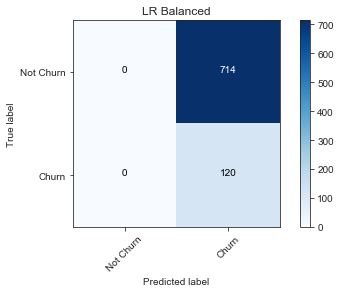

In [105]:
cm = confusion_matrix(y_test2,lr_balanced_gs_pred)
classes = ['Not Churn', 'Churn']
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='LR Balanced',
                          cmap=plt.cm.Blues)

### DTC Smote

In [111]:
fit_predict(dtc_smote_gs.best_estimator_,X_train_smote, y_train_smote,X_train2,y_train2)

Test Accuracy score:  0.9915966386554622
Test F1 score:  0.9702127659574468
Test ROC AUC score:  0.9710743801652892


In [112]:
dtc_smote_gs_pred = dtc_smote_gs.best_estimator_.predict(X_test2)

Confusion Matrix, without normalization
[[677  37]
 [ 21  99]]


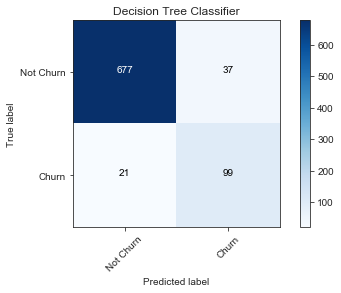

In [203]:
cm = confusion_matrix(y_test2,dtc_smote_gs_pred)
classes = ['Not Churn', 'Churn']
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Decision Tree Classifier',
                          cmap=plt.cm.Blues)

### RFC Upsampled

In [114]:
fit_predict(rfc_up_gs.best_estimator_,X_train_upsampled, y_train_upsampled,X_train2,y_train2)

Test Accuracy score:  0.9991996798719488
Test F1 score:  0.9972375690607734
Test ROC AUC score:  0.997245179063361


In [115]:
rfc_up_gs_pred = rfc_up_gs.best_estimator_.predict(X_test2)

Confusion Matrix, without normalization
[[697  17]
 [ 31  89]]


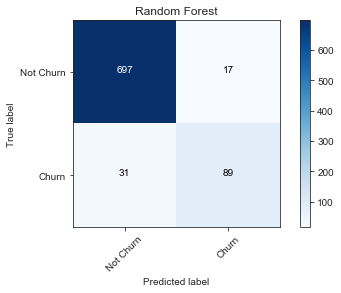

In [201]:
cm = confusion_matrix(y_test2,rfc_up_gs_pred)
classes = ['Not Churn', 'Churn']
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Random Forest',
                          cmap=plt.cm.Blues)

### XGBoost Upsampled

In [117]:
fit_predict(xgb_gs.best_estimator_,X_train_upsampled, y_train_upsampled,X_train2,y_train2)

Test Accuracy score:  0.9991996798719488
Test F1 score:  0.9972375690607734
Test ROC AUC score:  0.997245179063361


In [118]:
xgb_gs_pred = xgb_gs.best_estimator_.predict(X_test2)

Confusion Matrix, without normalization
[[700  14]
 [ 20 100]]


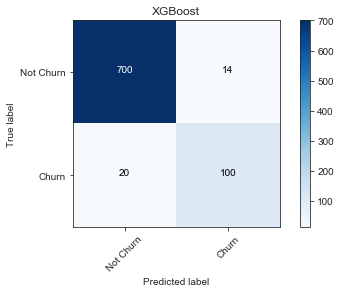

In [202]:
cm = confusion_matrix(y_test2,xgb_gs_pred)
classes = ['Not Churn', 'Churn']
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='XGBoost',
                          cmap=plt.cm.Blues)

Best Model is XGBoost Upsampled with Gridsearch

### Finding the most Influential Features

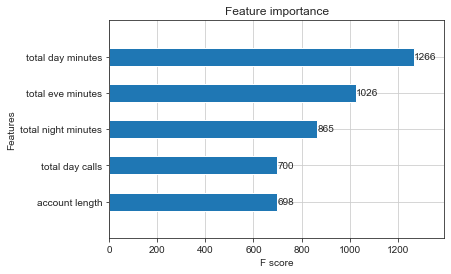

In [145]:
plot_importance(xgb_gs.best_estimator_, max_num_features=5,height = 0.5)

In [133]:
xgb_gs.best_estimator_.get_booster().get_fscore()

{'international plan_no': 213,
 'total day calls': 700,
 'total night calls': 695,
 'state_IL': 36,
 'state_CA': 35,
 'state_CO': 7,
 'state_WY': 2,
 'state_PA': 1,
 'state_MT': 39,
 'total day minutes': 1266,
 'total eve calls': 620,
 'voice mail plan_yes': 28,
 'state_IN': 14,
 'customer service calls': 376,
 'total intl calls': 357,
 'account length': 698,
 'number vmail messages': 265,
 'state_MI': 6,
 'state_VA': 9,
 'total intl minutes': 650,
 'total eve minutes': 1026,
 'state_ID': 14,
 'international plan_yes': 110,
 'voice mail plan_no': 69,
 'total night minutes': 865,
 'state_AL': 33,
 'state_ND': 8,
 'state_MN': 6,
 'state_AZ': 17,
 'state_OK': 5,
 'state_SC': 44,
 'state_SD': 6,
 'state_WI': 14,
 'state_MD': 13,
 'state_KS': 13,
 'state_OR': 9,
 'state_OH': 26,
 'state_ME': 14,
 'state_MA': 9,
 'state_NJ': 42,
 'state_VT': 3,
 'state_FL': 3,
 'state_NM': 8,
 'area code': 153,
 'state_WV': 21,
 'state_UT': 15,
 'state_NH': 21,
 'state_TX': 47,
 'state_WA': 4,
 'state_LA': 3

In [128]:
# best params
xgb_gs.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.05,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 500}